<a href="https://colab.research.google.com/github/kr19al0711/ds-cs982-student-success/blob/main/CS982_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS982 : Predict student success in an undergraduate degreee considering demographic, past academic record and socio-economics factors.
- **Data Source and Contributors**:
  - https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success
  - Realinho, Valentim, Mónica Vieira Martins, Jorge Machado, and Luís Baptista. 2021. Predict Students' Dropout and Academic Success. UCI Machine Learning Repository. https://doi.org/10.24432/C5MC89.

## Importing Python Libraries

In [113]:
#pandas import
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None #supresses warnings when copying dataframes

#importing matplotlib and seaborn for plotting graphs
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#importing scikit learn libraries for modelling, preprocessing and analysing resuls
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,silhouette_score,calinski_harabasz_score,completeness_score,homogeneity_score

## Importing Dataset

In [70]:
dataset_url = "https://archive.ics.uci.edu/static/public/697/predict+students+dropout+and+academic+success.zip"
source_data = pd.read_csv(dataset_url,sep=";")

## Data Cleanup

In [71]:
source_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [72]:
#summarizing the dataframe
source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [73]:
#checking the dataframe shape
source_data.shape

(4424, 37)

In [74]:
#checking for null values
source_data.isna().sum().sum()

0



---


In the above steps we just skimmed through the dataset and made the following observations:

1.   The dataset was successfully imported into a pandas dataframe
2.   There are 4424 observations in the source dataset
3.   There are 37 columns in the source dataset
4.   There are no null values in the source dataset




---







### Dropping irrelevent rows and columns

In [75]:
#Fetching columns in that dataset
source_data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd



---


The features in the `performance_data` list describe the performance of student during the academic year. Since we are predicting the success of the student based on factors like demographic, socio-economic and past academic factors these features can be dropped.

Additionally, the feature `Tuition fees up to date` is dropped too. Even though it indirectly relates to a students socio-economic factors, it can't be guaranteed at the time of enrollment.

Students who are currently enrolled and are pursuing their studies have the label `Enrolled`. The observations of these students are not useful in training the model as their actual academic success label could change. Hence we will also drop observations of students who are currently pursuing their studies.


---



In [76]:
#Removing \t from "Daytime/evening attendance\t" column
source_data.rename(columns = {"Daytime/evening attendance\t":"Daytime/evening attendance"},inplace=True)

# Demographic Features
demographic_data = [
    'Marital status',
    'Nacionality',
    'Gender',
    'Age at enrollment',
    'International',
    'Educational special needs'
]

# Socio-Economic Features
socio_economic_data = [
    'Mother’s qualification',
    'Father’s qualification',
    'Mother’s occupation',
    'Father’s occupation',
    'Unemployment rate',
    'Inflation rate',
    'GDP',
    'Scholarship holder',
    'Displaced',
    'Debtor'
]

# Academic Features
academic_data = [
    'Application order',
    'Course',
    'Previous qualification',
    'Previous qualification (grade)',
    'Admission grade',
    'Application mode',
    'Daytime/evening attendance'
]

# Academic Features to be dropped.
academic_data_dropped=[
    'Tuition fees up to date',
]

# Performance Features
performance_data = [
    'Curricular units 1st sem (credited)',
    'Curricular units 1st sem (enrolled)',
    'Curricular units 1st sem (evaluations)',
    'Curricular units 1st sem (approved)',
    'Curricular units 1st sem (grade)',
    'Curricular units 1st sem (without evaluations)',
    'Curricular units 2nd sem (credited)',
    'Curricular units 2nd sem (enrolled)',
    'Curricular units 2nd sem (evaluations)',
    'Curricular units 2nd sem (approved)',
    'Curricular units 2nd sem (grade)',
    'Curricular units 2nd sem (without evaluations)'
]

target = ["Target"]

drop_features = academic_data_dropped + performance_data


In [77]:
#Dropping enrolled student observations
data = source_data[source_data["Target"] != "Enrolled"]

In [78]:
#Dropping performance and irrelevent academic features
data.drop(drop_features,inplace=True,axis=1)

In [79]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Educational special needs,Debtor,Gender,Scholarship holder,Age at enrollment,International,Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,1,0,20,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,1,0,19,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,1,0,19,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,0,0,20,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,0,0,45,0,13.9,-0.3,0.79,Graduate


In [80]:
#summarizing updated dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3630 entries, 0 to 4423
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Marital status                  3630 non-null   int64  
 1   Application mode                3630 non-null   int64  
 2   Application order               3630 non-null   int64  
 3   Course                          3630 non-null   int64  
 4   Daytime/evening attendance      3630 non-null   int64  
 5   Previous qualification          3630 non-null   int64  
 6   Previous qualification (grade)  3630 non-null   float64
 7   Nacionality                     3630 non-null   int64  
 8   Mother's qualification          3630 non-null   int64  
 9   Father's qualification          3630 non-null   int64  
 10  Mother's occupation             3630 non-null   int64  
 11  Father's occupation             3630 non-null   int64  
 12  Admission grade                 3630 no

---

The number of observations and columns in our dataset are now reduced to 3630 and 23 respectively

---

## Exploratory Data Analysis


## Modelling

In [81]:
#creating a copy of data to perfrom EDA
eda_data = data.copy()

### Preprocessing

In [82]:
#splitting features and labels
#feature dataframe
X = data.drop(columns="Target",axis=1)

#label dataframe
y = data["Target"]

#encoding labels
y_encoder = LabelEncoder()
y = y_encoder.fit_transform(y)
# y.columns = ["Target"]

#splitting dataset into training and testing datasets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 1)

print(f"Training feature shape : {X_train.shape}")
print(f"Training label shape : {y_train.shape}")
print(f"Testing feature shape : {X_test.shape}")
print(f"Testing label shape : {y_test.shape}")

Training feature shape : (2722, 23)
Training label shape : (2722,)
Testing feature shape : (908, 23)
Testing label shape : (908,)


### Supervised Learning

In [83]:
#creating a logistice regression object
logreg = LogisticRegression(max_iter= 5000,solver ="newton-cg")
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=5000, solver='newton-cg')

In [84]:
#fetching predictions
y_predict = logreg.predict(X_test)

In [92]:
#generating classification report
logreg_classification_report = classification_report(y_test,y_predict)
print(logreg_classification_report)

              precision    recall  f1-score   support

           0       0.71      0.58      0.63       358
           1       0.75      0.84      0.80       550

    accuracy                           0.74       908
   macro avg       0.73      0.71      0.71       908
weighted avg       0.73      0.74      0.73       908



[[206 152]
 [ 86 464]]


<Axes: title={'center': 'Confusion Matrix of Logistic Regression Model \nDrop Out=0 Graduate= 1'}>

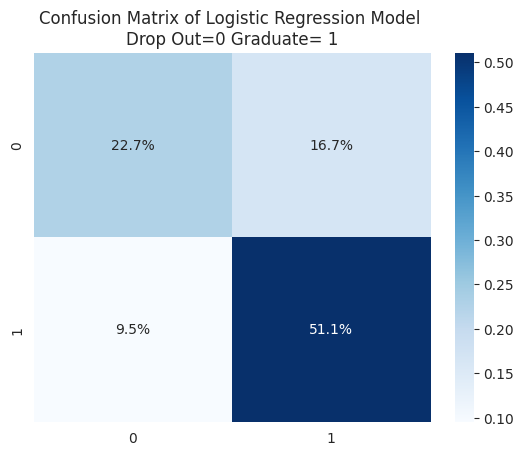

In [93]:
#generating confusion matrix
logreg_confusion_matrix = confusion_matrix(y_test,y_predict)
print(logreg_confusion_matrix)
plt.title("Confusion Matrix of Logistic Regression Model \nDrop Out=0 Graduate= 1")
sns.set_style(style="whitegrid")
sns.heatmap(logreg_confusion_matrix/np.sum(logreg_confusion_matrix),annot=True,cmap="Blues",fmt='.1%')

In [87]:
#checking the probability matrix
y_predict_prob = logreg.predict_proba(X_test)[:,1]

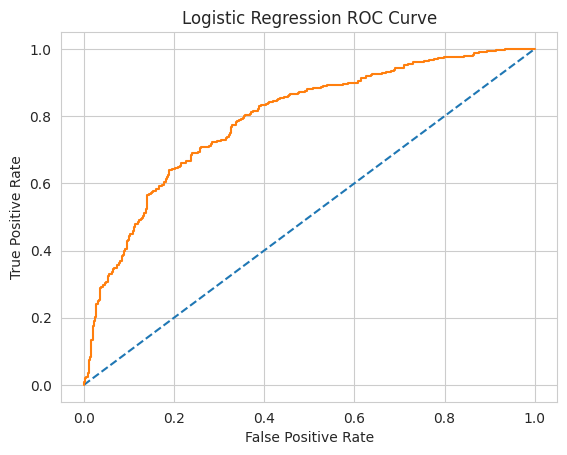

In [89]:
#plotting the ROC curve
fpr,tpr,threshold = roc_curve(y_test,y_predict_prob)
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Logistic Regression ROC Curve')
plt.show()

In [90]:
#model coefficients
features = demographic_data+socio_economic_data+academic_data
pd.DataFrame({'Coeff': logreg.coef_[0]},index=features)

,Coeff
Marital status,0.106684
Nacionality,-0.014567
Gender,-0.009370
Age at enrollment,0.000024
International,-0.261517
Educational special needs,0.002478
Mother’s qualification,-0.000730
Father’s qualification,-0.014234
Mother’s occupation,-0.001012
Father’s occupation,0.001534


### Unsupervised Learning

In [105]:
#creating k-means clustering object
kmeans = KMeans(n_clusters=2)
kmeans.fit(X,y)

KMeans(n_clusters=2)

In [114]:
#analysing the model output
silhouette_score_results_kmeans = silhouette_score(X, kmeans.labels_)
print(f"Silhouette Score : {silhouette_score_results_kmeans}")
calinski_harabasz_score_results_kmeans = calinski_harabasz_score(X,kmeans.labels_)
print(f"Calinski Harabasz Score : {calinski_harabasz_score_results_kmeans}")
completeness_score_results_kmeans = completeness_score(y,kmeans.labels_)
print(f"Completeness Score : {completeness_score_results_kmeans}")
homogeneity_score_results_kmeans = homogeneity_score(y,kmeans.labels_)
print(f"Homogeneity Score : {homogeneity_score_results_kmeans}")

Silhouette Score : 0.9511411868149573
Calinski Harabasz Score : 82727.35046104372
Completeness Score : 0.0044419099117329235
Homogeneity Score : 0.0013467306491059899
